# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [9]:
# Dependencies
import json
import requests
import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt
from citipy import citipy
import random
from datetime import datetime
import seaborn as sns

## Generate Cities List

In [10]:
cities = []

while len(cities)<600:
        lats = (random.choice(range(-90,90)))
        longs = (random.choice(range(-180,180)))
        city= citipy.nearest_city(lats,longs).city_name
        
        if city not in cities:
            cities.append(city)
len(cities)



600

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [11]:
from api_keys_weather import api_key
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
appid = api_key
settings = {"units": "imperial", "appid": api_key}
query_url = f"{url}appid={api_key}&units={units}&q="
response = requests.get(query_url + city).json()
response

{'cod': '404', 'message': 'city not found'}

In [12]:
#city

In [13]:
#query_url

In [14]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
hum = []
cloud = []
wind = []
date = []
cit_num = 0
cit_name = []
country = []

In [15]:
# Loop through the list of cities and perform a request for data on each

for city in cities:
    try:
        response = requests.get(query_url + city).json()
        
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        hum.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind.append(response['wind']['speed'])
        date.append(response['dt'])
        cit_name.append(response['name'])
        country.append(response['sys']['country'])
        cit_num = cit_num + 1
        
        print(f"Data found for city number: {cit_num}, city name: {response['name']}")
        
    except:
        print(f"City data for {city} not found. Move on to next.")
        
    

Data found for city number: 1, city name: Hamilton
Data found for city number: 2, city name: Jamestown
City data for illoqqortoormiut not found. Move on to next.
Data found for city number: 3, city name: Port Elizabeth
Data found for city number: 4, city name: Ushuaia
City data for samusu not found. Move on to next.
Data found for city number: 5, city name: Atuona
Data found for city number: 6, city name: Skegness
Data found for city number: 7, city name: Torbay
Data found for city number: 8, city name: Punta Arenas
Data found for city number: 9, city name: Chapais
Data found for city number: 10, city name: Sikonge
Data found for city number: 11, city name: Mossamedes
Data found for city number: 12, city name: Rikitea
Data found for city number: 13, city name: Honiara
Data found for city number: 14, city name: Narrabri
City data for taolanaro not found. Move on to next.
Data found for city number: 15, city name: Kokoda
Data found for city number: 16, city name: Faya
Data found for city

Data found for city number: 146, city name: Luján
Data found for city number: 147, city name: Knysna
Data found for city number: 148, city name: Berlevåg
Data found for city number: 149, city name: Vao
Data found for city number: 150, city name: Avera
Data found for city number: 151, city name: Ballina
Data found for city number: 152, city name: Nuuk
City data for umzimvubu not found. Move on to next.
Data found for city number: 153, city name: Novikovo
City data for sentyabrskiy not found. Move on to next.
Data found for city number: 154, city name: Vaini
Data found for city number: 155, city name: Katsuura
Data found for city number: 156, city name: Nanortalik
City data for attawapiskat not found. Move on to next.
Data found for city number: 157, city name: East London
Data found for city number: 158, city name: Tabou
Data found for city number: 159, city name: Kloulklubed
Data found for city number: 160, city name: Grajaú
Data found for city number: 161, city name: Yar-Sale
Data fou

Data found for city number: 289, city name: Sambava
Data found for city number: 290, city name: New Bern
Data found for city number: 291, city name: São Félix do Xingu
Data found for city number: 292, city name: Bosaso
Data found for city number: 293, city name: Betlitsa
Data found for city number: 294, city name: Manzhouli
Data found for city number: 295, city name: Skjervøy
Data found for city number: 296, city name: Acapulco de Juárez
Data found for city number: 297, city name: Okha
Data found for city number: 298, city name: Palu
Data found for city number: 299, city name: Novobirilyussy
Data found for city number: 300, city name: Sidi Ali
Data found for city number: 301, city name: Comodoro Rivadavia
Data found for city number: 302, city name: Beirut
City data for kleck not found. Move on to next.
Data found for city number: 303, city name: Kocsér
Data found for city number: 304, city name: Sørland
Data found for city number: 305, city name: Olafsvik
Data found for city number: 30

Data found for city number: 426, city name: Mahina
Data found for city number: 427, city name: Martapura
Data found for city number: 428, city name: Pecos
Data found for city number: 429, city name: Visby
Data found for city number: 430, city name: Pinega
Data found for city number: 431, city name: Chute-aux-Outardes
Data found for city number: 432, city name: Cukai
Data found for city number: 433, city name: Saint-Augustin
Data found for city number: 434, city name: Hailar
Data found for city number: 435, city name: Departamento de Maldonado
Data found for city number: 436, city name: Cayenne
Data found for city number: 437, city name: Shiyan
Data found for city number: 438, city name: The Pas
Data found for city number: 439, city name: Salgar
Data found for city number: 440, city name: Morón
Data found for city number: 441, city name: Yulara
Data found for city number: 442, city name: Santa Cruz de la Sierra
Data found for city number: 443, city name: Eureka
Data found for city numbe

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
weather_dict = {"City": cit_name, "Country": country, "Latitude": lat, "Longitude": lon,
"Max Temp": temp, "Humidity": hum, "Cloudiness": cloud, "Wind Speed": wind, "Date": date}

weather_data = pd.DataFrame(weather_dict)
weather_data.head()

,City,Country,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,Hamilton,US,39.1834,-84.5333,70.0,77,90,4.61,1619617262
1,Jamestown,US,42.0970,-79.2353,66.2,55,1,11.50,1619617289
2,Port Elizabeth,ZA,-33.9180,25.5701,69.8,73,0,11.50,1619617290
3,Ushuaia,AR,-54.8000,-68.3000,39.2,87,40,9.60,1619617290
4,Atuona,PF,-9.8000,-139.0333,79.2,71,99,12.01,1619617291


In [17]:
weather_data.count()

City          548
Country       548
Latitude      548
Longitude     548
Max Temp      548
Humidity      548
Cloudiness    548
Wind Speed    548
Date          548
dtype: int64

In [18]:
weather_data.to_csv("WeatherPy.csv", encoding="utf-8", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
weather_data.describe()

,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,548.000000,548.000000,548.000000,548.000000,548.000000,548.000000,5.480000e+02
mean,20.537153,13.173163,62.284526,68.930657,56.974453,7.696934,1.619617e+09
std,33.530969,91.831978,20.873714,22.232499,38.518963,4.738279,1.724955e+02
min,-54.800000,-179.166700,2.160000,1.000000,0.000000,0.310000,1.619617e+09
25%,-7.998075,-68.784350,46.400000,58.750000,16.750000,4.470000,1.619617e+09
50%,23.927200,17.513750,66.100000,73.000000,75.000000,6.900000,1.619617e+09
75%,49.137600,95.003700,78.800000,86.000000,95.250000,10.360000,1.619617e+09
max,78.218600,179.316700,107.600000,100.000000,100.000000,33.550000,1.619617e+09


In [20]:
#  Get the indices of cities that have humidity over 100%.
try:
    res = next(x for x, val in enumerate(hum) if val > 100)

    print("The index of element just greater than 100 : "+ str(res))

except:
    print("There are no cities with humidity over 100")

There are no cities with humidity over 100


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

R squared: 0.33033850292654776


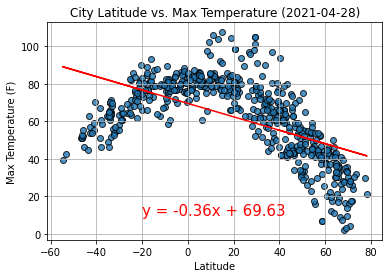

In [21]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsTemp.png")

# Show plot
plt.show()

# This is a comparison between latitude and temperature, showing a correlation between the cities' location and its max temperatures. The closer they are to the equator, the higher the max temperature.

## Latitude vs. Humidity Plot

R squared: 0.0037771159235655475


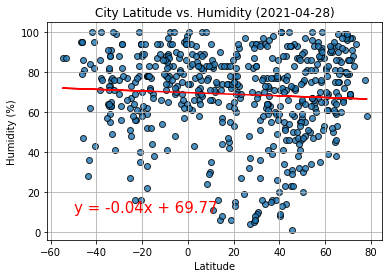

In [22]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsHum.png")

# Show plot
plt.show()

# This is a comparison between latitude and humidity, showing that there does not eem to be any correlation between the cities' location and its max temperatures.

## Latitude vs. Cloudiness Plot

R squared: 0.006316233719343793


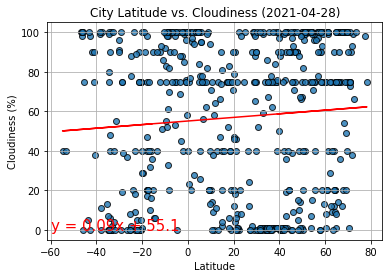

In [23]:
## Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-60,0),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsCloud.png")

# Show plot
plt.show()

# This is a comparison between latitude and cloudiness, showing there is not really a correlation between the cities' location and its cloudiness percentages. 

## Latitude vs. Wind Speed Plot

R squared: 0.002609134833456949


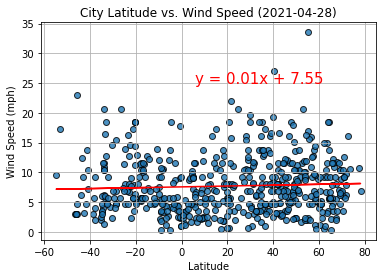

In [24]:
# Convert to floats and store as x and y values
x_values = weather_data['Latitude'].astype('float')
y_values = weather_data['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("LatVsWind.png")

# Show plot
plt.show()

# This is a comparison between latitude and wind speed, showing there is no correlation between the cities' location and its wind speeds.

## Linear Regression

In [25]:
north = weather_data.loc[weather_data["Latitude"] >= 0]
south = weather_data.loc[weather_data["Latitude"] < 0]


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.7211504191581084


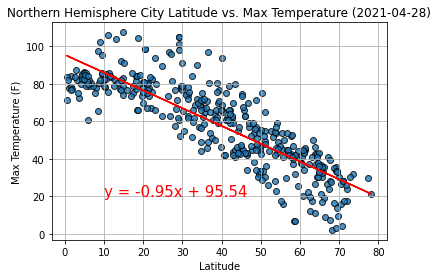

In [26]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Northern Hemisphere City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsTemp.png")

# Show plot
plt.show()

# This is a comparison between the northern hemisphere cities and max temperature, showing a correlation between the cities' location and its max temperatures. The closer the cities are to the equator, the higher the max temperature. This is to be expected.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6015400594699686


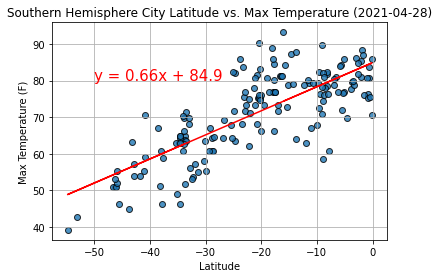

In [27]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Max Temp'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title(f'Southern Hemisphere City Latitude vs. Max Temperature ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsTemp.png")

# Show plot
plt.show()

# This is a comparison between the southern hemisphere cities and max temperature, showing a correlation between the cities' location and its max temperatures. The closer they are to the equator, the higher the max temperature. This is to be expected. This is slightly less correlated than in the norhtern hemisphere in this graph on this day. Currently we are also in spring months, so this could slightly impact max temperatures comapred to summer months. Another reason is that there are a higher number of cities in the nothern hemisphere, so there is more data to show a stronger correlation.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.011811319670672008


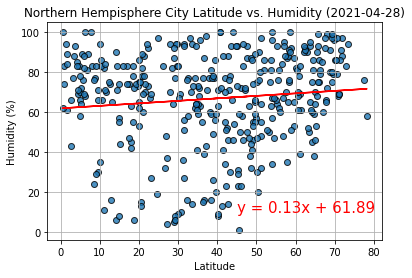

In [28]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(45,10),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Northern Hempisphere City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsHum.png")

# Show plot
plt.show()

# This is a comparison between the northern hemisphere cities and humidity, showing there is not really a correlation between the cities' location and its humidity. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.008420137843370076


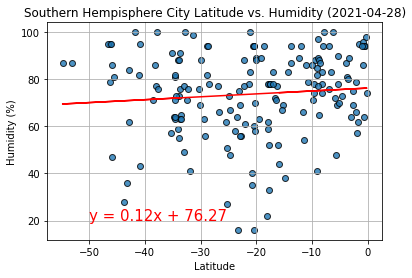

In [29]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Humidity'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title(f'Southern Hempisphere City Latitude vs. Humidity ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsHum.png")

# Show plot
plt.show()

# This is a comparison between the southern hemisphere cities and humidity, showing there is not really a correlation between the cities' location and its humidity. There is an even weaker correlation in these southern cities than the northern cities.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.009391424497340912


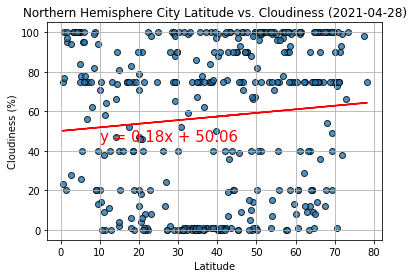

In [30]:
## Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,45),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Northern Hemisphere City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsCloud.png")

# Show plot
plt.show()

# This is a comparison between the northern hemisphere cities and cloudiness, showing there is not really a correlation between the cities' location and its cloudiness. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.061244571278663805


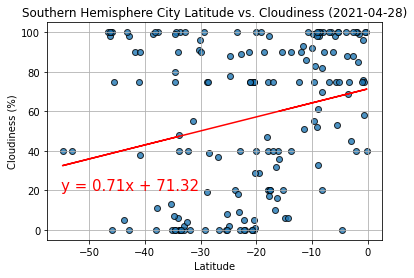

In [31]:
## Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Cloudiness'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title(f'Southern Hemisphere City Latitude vs. Cloudiness ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsCloud.png")

# Show plot
plt.show()

# This is a comparison between the southern hemisphere cities and cloudiness, showing there is not really a correlation between the cities' location and its cloudiness. The correlation slope seems to be higher but there is more deviation from the line showing there is still not a stronger correlation in southern vs northern hemipshere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.013899308243004697


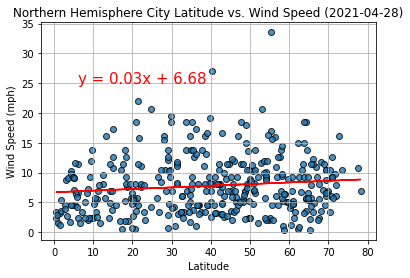

In [32]:
# Convert to floats and store as x and y values
x_values = north['Latitude'].astype('float')
y_values = north['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,25),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Northern Hemisphere City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("NorthLatVsWind.png")

# Show plot
plt.show()

# This is a comparison between the northern hemisphere cities and wind speed, showing there is not really a correlation between the cities' location and its wind speed. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.015005654354216037


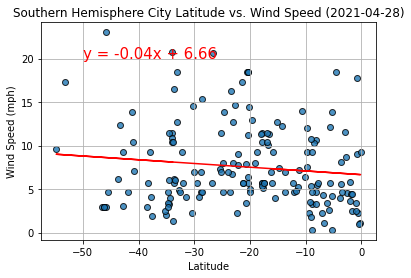

In [33]:
# Convert to floats and store as x and y values
x_values = south['Latitude'].astype('float')
y_values = south['Wind Speed'].astype('float')

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values, alpha=0.8, edgecolor="black", linewidths=1)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

# Label plot
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title(f'Southern Hemisphere City Latitude vs. Wind Speed ({datetime.now().date()})')
plt.grid(True)
sns.set

# Print r square value
print(f"R squared: {rvalue**2}")

plt.savefig("SouthLatVsWind.png")

# Show plot
plt.show()

# This is a comparison between the southern hemisphere cities and wind speed, showing there is not really a correlation between the cities' location and its wind speed. 